In [1]:
!gdown 1PjlddeVPc0YLfENTGvj1OcatIhCKvLoC

Downloading...
From: https://drive.google.com/uc?id=1PjlddeVPc0YLfENTGvj1OcatIhCKvLoC
To: /content/Imagenes_TG_10p.zip
100% 11.0M/11.0M [00:00<00:00, 152MB/s]


In [2]:
!unzip Imagenes_TG_10p.zip

Archive:  Imagenes_TG_10p.zip
  inflating: waifu_52.jpg            
  inflating: machop.jpg              
  inflating: cr_imagen_99.jpg        
  inflating: Copia de rec_img054.jpg  
  inflating: bulbasaur.jpg           
  inflating: golem.jpg               
  inflating: 5b733e9c7d0017afee8ab1f7acef4f79.jpg  
  inflating: ninetales.jpg           
  inflating: Copia de rec_img069.jpg  
  inflating: cr_imagen_104.jpg       
  inflating: Copia de rec_img041.jpg  
  inflating: gA09IKUh_400x400.jpg    
  inflating: cr_imagen_66.jpg        
  inflating: vileplume.jpg           
  inflating: waifu_29.jpg            
  inflating: Copia de roblox_52.jpg  
  inflating: 611138.jpg              
  inflating: Copia de rec_img023.jpg  
  inflating: soccer_4.jpg            
  inflating: soccer_6.jpg            
  inflating: caterpie.jpg            
  inflating: cr_imagen_126.jpg       
  inflating: soccer_74.jpg           
  inflating: waifu_32.jpg            
  inflating: descarga (6).jpg        
  

In [3]:
import os, os.path
file_list = os.listdir("/content/")
print(file_list)

['.config', 'soccer_64.jpg', '1343746.jpg', 'bellsprout.jpg', 'soccer_54.jpg', 'waifu_64.jpg', 'waifu_71.jpg', 'waifu_54.jpg', 'Copia de roblox_23.jpg', 'Copia de rec_img068.jpg', 'voltorb.jpg', 'soccer_26.jpg', 'soccer_32.jpg', 'cr_imagen_81.jpg', 'jigglypuff.jpg', 'soccer_67.jpg', 'waifu_80.jpg', 'waifu_52.jpg', 'soccer_40.jpg', 'Copia de rec_img069.jpg', 'cr_imagen_52.jpg', 'soccer_players_teams_crowd_22.jpg', 'wigglytuff.jpg', 'MV5BNzViMjFmYTUtYmEzMC00OTE0LWExY2YtMTlmNTkwY2Y3MWFhXkEyXkFqcGc@._V1_.jpg', '659503.jpg', 'doduo.jpg', 'soccer_players_teams_crowd_8.jpg', 'Copia de rec_img030.jpg', 'soccer_18.jpg', 'psyduck.jpg', 'Copia de rec_img092.jpg', 'exeggcute.jpg', '1337463.jpg', 'cr_imagen_10.jpg', '256x256bb.jpg', 'cr_imagen_80.jpg', 'soccer_52.jpg', 'cr_imagen_2.jpg', 'Copia de rec_img066.jpg', 'soccer_41.jpg', '551139.jpg', '1317019.jpg', 'cr_imagen_118.jpg', 'cr_imagen_137.jpg', 'image.jpg', 'Copia de rec_img067.jpg', 'cr_imagen_32.jpg', '339932.jpg', 'soccer_27.jpg', 'soccer_

In [5]:
image_set

['/content/soccer_64.jpg',
 '/content/1343746.jpg',
 '/content/bellsprout.jpg',
 '/content/soccer_54.jpg',
 '/content/waifu_64.jpg',
 '/content/waifu_71.jpg',
 '/content/waifu_54.jpg',
 '/content/Copia de roblox_23.jpg',
 '/content/Copia de rec_img068.jpg',
 '/content/voltorb.jpg',
 '/content/soccer_26.jpg',
 '/content/soccer_32.jpg',
 '/content/cr_imagen_81.jpg',
 '/content/jigglypuff.jpg',
 '/content/soccer_67.jpg',
 '/content/waifu_80.jpg',
 '/content/waifu_52.jpg',
 '/content/soccer_40.jpg',
 '/content/Copia de rec_img069.jpg',
 '/content/cr_imagen_52.jpg',
 '/content/soccer_players_teams_crowd_22.jpg',
 '/content/wigglytuff.jpg',
 '/content/MV5BNzViMjFmYTUtYmEzMC00OTE0LWExY2YtMTlmNTkwY2Y3MWFhXkEyXkFqcGc@._V1_.jpg',
 '/content/659503.jpg',
 '/content/doduo.jpg',
 '/content/soccer_players_teams_crowd_8.jpg',
 '/content/Copia de rec_img030.jpg',
 '/content/soccer_18.jpg',
 '/content/psyduck.jpg',
 '/content/Copia de rec_img092.jpg',
 '/content/exeggcute.jpg',
 '/content/1337463.jpg',

In [ ]:
import numpy as np
import cv2
import os, os.path

imageDir = "/content/"
image_set = []

#Creamos una lista con las extensiones aceptadas en la aplicacion
# <---- windows jpg
# <---- otros   jpeg
valid_image_extensions = [".jpg", ".jpeg"]
# convetir en minúsculas
valid_image_extensions = [item.lower() for item in valid_image_extensions]

# obtener todos los archivos en /200.
file_list = os.listdir(imageDir)

#Recorremos cada archivo y lo incluimos si cumple con la extension
for file in file_list:
    extension = os.path.splitext(file)[1]
    if extension.lower() not in valid_image_extensions:
        continue
    image_set.append(os.path.join(imageDir, file))

# image_set -> guarda los nombres de cada imagen

#Creamos un diccionario
dict = {}
# imagen -> histograma comprimido en 1D

#Para cada imagen, la leemos, calculamos el histograma, lo aplanamos y normalizamos
#El histograma se guarda en un diccionario
for imageName in image_set:

    #para que se lea a blanco y negro:
    #image = cv2.imread(imageName,0)
    #para que se lea a color:
    print(imageName)
    image = cv2.imread(imageName) #OpenCV lee en formato BGR (azul, verde y rojo)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([image], [0,1], None, [8,8], [0, 128, 0 , 256]) #tamaño del hist: 8^3 = 512
    #en blanco y negro:
    #hist = cv2.calcHist([image], [0], None, [8], [0, 256])
    # aplanar el histograma a 1D
    desc = hist.flatten()
    # descriptor -> histograma 1D
    desc = desc/(image.shape[0] * image.shape[1])
    dict[imageName] = desc



In [13]:
#Hacer busqueda de una imagen aleatoria
import random

#Escogemos un archivo aleatorio
queryName = "waifu_54.jpg"
print(queryName)



#Calculamos el histograma para la imagen seleccionada
queryImage = cv2.imread(os.path.join(imageDir, queryName))
queryImage = cv2.cvtColor(queryImage,cv2.COLOR_BGR2RGB)
queryHist = cv2.calcHist([queryImage],[0,1],None,[8,8],[0,128,0,256])
descQuery = queryHist.flatten()
descQuery = descQuery/(queryImage.shape[0]*queryImage.shape[1])

#Calculamos las distancias a los histogramas almacenados
distances = []

for imageName in image_set:
    # distancia euclidiana de la imagen con respecto a las demás
    dist = np.linalg.norm(descQuery - dict[imageName])
    distances.append(dist)

#Ordenamos por distancias
index = np.argsort(distances)



waifu_54.jpg


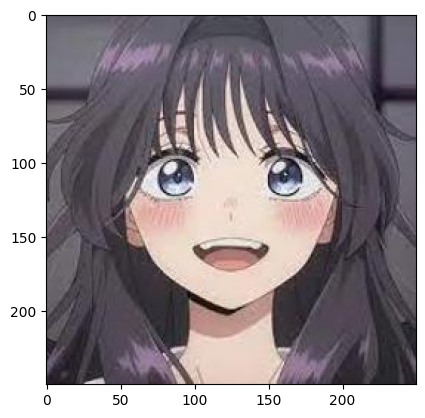

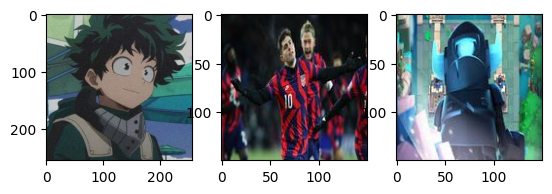

In [14]:
from matplotlib import pyplot as plt

#Seleccionamos los tres menores para visualizar
# fig1 = plt.imshow(queryImage[:,:,::-1])
fig1 = plt.imshow(queryImage, cmap='gray')
#fig1 = plt.imshow(queryImage, cmap='gray')
plt.show()

fig2 = plt.figure()

for i in range(1, 4):
    fig2.add_subplot(1, 3, i)
    imag = cv2.imread(image_set[index[i]])
    plt.imshow(imag[:,:,::-1])

plt.show()
